In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("gld_price_data.csv")

In [3]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
df["month"] = df['Date'].apply(lambda x: x.split("/")[0])
df["date"] = df['Date'].apply(lambda x: x.split("/")[1])
df["year"] = df['Date'].apply(lambda x: x.split("/")[2])

In [7]:
df.drop("Date", axis=1, inplace = True)

<Axes: >

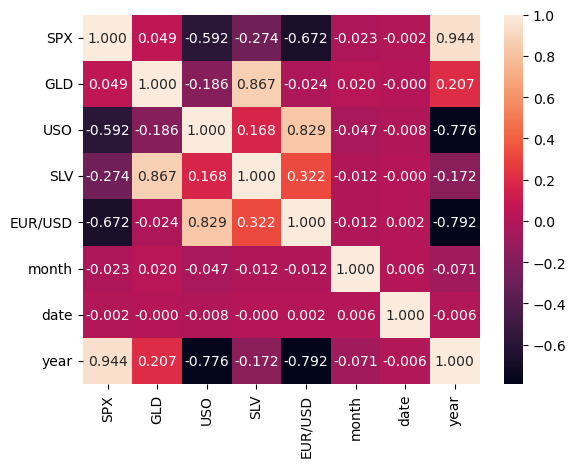

In [8]:
sns.heatmap(df.corr(), annot= True, fmt=".3f")

<Axes: xlabel='GLD', ylabel='SPX'>

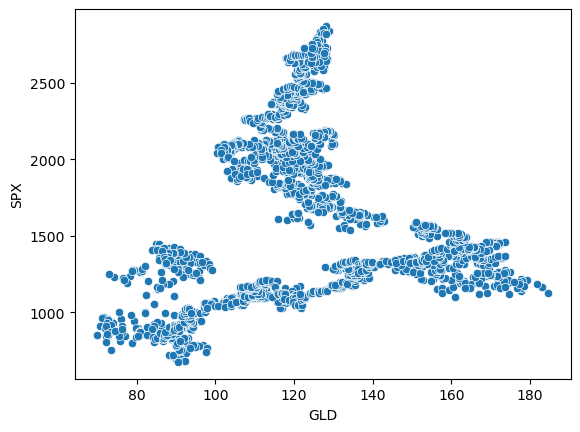

In [9]:
sns.scatterplot(data=df, x="GLD",y="SPX")

In [10]:
X = df.drop(["date", "GLD"], axis=1)
y = df["GLD"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear = LinearRegression()

In [15]:
linear.fit(X_train, y_train)

LinearRegression()

In [16]:
l_predictions = linear.predict(X_test)

Text(0, 0.5, 'Predicted Values')

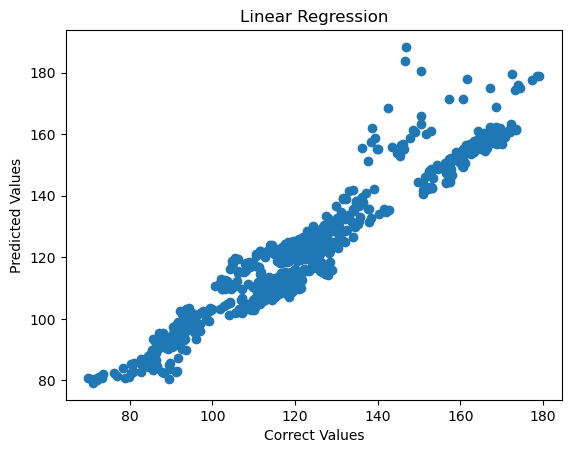

In [18]:
plt.scatter(x=y_test, y = l_predictions)
plt.title("Linear Regression")
plt.xlabel("Correct Values")
plt.ylabel("Predicted Values")

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
np.sqrt(mean_squared_error(y_test, l_predictions))

6.7483042568274145

In [30]:
r2_score(y_test, l_predictions)

0.9160544669670997

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
forest = RandomForestRegressor()

In [24]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
f_predict = forest.predict(X_test)

Text(0, 0.5, 'Predicted Values')

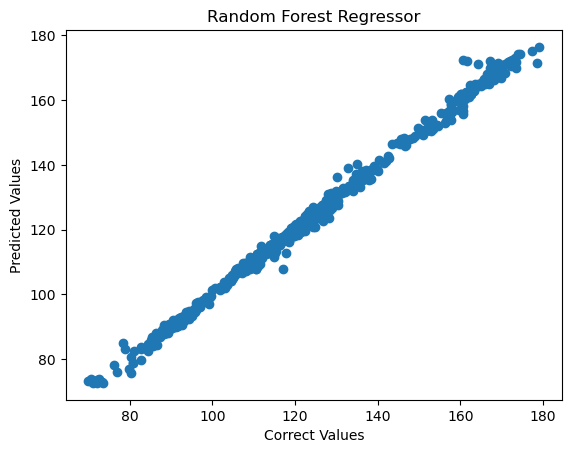

In [27]:
plt.scatter(x=y_test, y = f_predict)
plt.title("Random Forest Regressor")
plt.xlabel("Correct Values")
plt.ylabel("Predicted Values")

In [28]:
np.sqrt(mean_squared_error(y_test, f_predict))

1.5229436241220982

In [29]:
r2_score(y_test, f_predict)

0.9957246080524773